<h1>Nomes do Brasil</h1>

<p>Esse notebook se destina a oferecer uma visão sobre os principais nomes utilizados no Brasil.</p>

## Importações
<p>Principais bibliotecas do Python utilizadas, e também arquivos do projeto.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import ast
import seaborn as sns


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from src.principal import AcessoAPINomeIBGE
from itertools import chain

## Arquivos Externos
<p>Localização dos arquivos que serão utilizados, basicamente os arquivos da pasta data, os .csv</p>

In [2]:
states = 'data/estados.csv'
cities = 'data/municipios.csv'
apis_ibge = 'data/links_APIs.csv'

## Inicializando alguns objetos

### Carregando as string de conexão

In [3]:
pr = AcessoAPINomeIBGE(apis_ibge)

In [4]:
pr.fn_captar_strings_conexao_arquivo_csv()

### String Captadas

In [5]:
pr.lst_apis_ibge

['https://servicodados.ibge.gov.br/api/v2/censos/nomes/{nomes}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/{nomes}?sexo={sexo}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/{nomes}?groupBy=UF',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/{nomes}?localidade={municipioEstado}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking/?decada={decada}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking?localidade={municipioEstado}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking/?sexo={sexo}']

## Ranking dos nomes mais utilizados

### Exibir algumas informações da função

In [6]:
print(pr.fn_IBGE_listar_ranking_dos_nomes_mais_frequentes.__doc__)


            Function: função que retorna uma lista com o rank dos nomes mais frequentes
    
            Args:
    
            Return:
                int: resposta http
                list: lista com as informações
        


### Criar uma lista com apenas os nomes, basicamente uma lista de dicionarios de nomes

In [7]:
# Captar as informações da API
int_response, lst_names_ranking = pr.fn_IBGE_listar_ranking_dos_nomes_mais_frequentes()

In [8]:
# Usando uma list comprehesion, para captar apenas uma lista de nomes
lst_names_ranking_aux = [ra['res'] for ra in lst_names_ranking]

In [9]:
lst_names_ranking_aux[0][0:3]

[{'nome': 'MARIA', 'frequencia': 11734129, 'ranking': 1},
 {'nome': 'JOSE', 'frequencia': 5754529, 'ranking': 2},
 {'nome': 'ANA', 'frequencia': 3089858, 'ranking': 3}]

### Dataframe com o ranking dos nomes mais utilizados
   

In [10]:
df_names_ranking = pd.DataFrame(list(chain.from_iterable(lst_names_ranking_aux)))

In [11]:
df_names_ranking.head(3)

,nome,frequencia,ranking
0,MARIA,11734129,1
1,JOSE,5754529,2
2,ANA,3089858,3


### Plotagem de Barras com os nomes mais utilizados

Text(0, 0.5, 'Frequêcia (Nº em Dezenas de Milhões)')

<Figure size 1080x720 with 0 Axes>

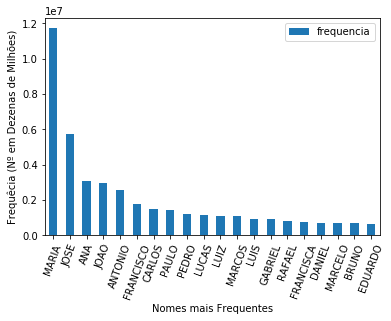

In [23]:
#Tamanho da Figura(1080x720)
plt.figure(figsize=(15,10))
# Definição dos eixos do grafico
ax = df_names_ranking.plot.bar(x='nome', y='frequencia')
# Rotação do eixo x em 70°
plt.xticks(rotation = 70)
# Renomear a label 
plt.xlabel("Nomes mais Frequentes")

plt.ylabel("Frequêcia (Nº em Dezenas de Milhões)")

#### WordCloud pela Frequencia de nomes

In [13]:
### PENDENTE

## Ranking dos nomes mais utilizados por década

<p>Será feita uma analise dos nomes mais utilizados entres as décadas de 1930 e 2010</p>

In [13]:
print(pr.fn_IBGE_listar_ranking_dos_nomes_mais_frequentes_por_decada.__doc__)


            Function: função que retorna uma lista com os nomes mais frequentes usados em uma determinada decada
    
            Args:
                int: decada a ser pesquisada
            Return:
                int: resposta http
                list: lista com as informações da frequencia do nome
        


<p>Uma vez obtido a informação dos nomes mais utilizados em uma década, podemos utilizar uma estrutura para trazer todos de uma vez, sem precisar replicar o mesmo código n vezes</p>

In [14]:
lst_decadas = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
lst_names_ranking_aux = []
lst_names_ranking = []
for dec in lst_decadas:
    int_response, lst_names_ranking_aux = pr.fn_IBGE_listar_ranking_dos_nomes_mais_frequentes_por_decada(dec)
    if int_response == 200: # OK
        for es in lst_names_ranking_aux:
            es.update( {"decada":dec}) 
        lst_names_ranking += lst_names_ranking_aux
    # 1 Segundo de espera até a próxima requisição
    time.sleep(1)

<p>Foi gerada uma lista unidimensional onde cada 'linha' possui uma lista com as informações da API, e ao mesmo tempo, foi acrescido uma chave com a informação da década de referência <p>

In [18]:
lst_names_ranking[0:1]

[{'localidade': 'BR',
  'sexo': None,
  'res': [{'nome': 'MARIA', 'frequencia': 336477, 'ranking': 1},
   {'nome': 'JOSE', 'frequencia': 118121, 'ranking': 2},
   {'nome': 'ANTONIO', 'frequencia': 60651, 'ranking': 3},
   {'nome': 'JOAO', 'frequencia': 60155, 'ranking': 4},
   {'nome': 'ANA', 'frequencia': 33395, 'ranking': 5},
   {'nome': 'FRANCISCO', 'frequencia': 33338, 'ranking': 6},
   {'nome': 'MANOEL', 'frequencia': 28241, 'ranking': 7},
   {'nome': 'FRANCISCA', 'frequencia': 27317, 'ranking': 8},
   {'nome': 'ANTONIA', 'frequencia': 22746, 'ranking': 9},
   {'nome': 'PEDRO', 'frequencia': 21483, 'ranking': 10},
   {'nome': 'JOSEFA', 'frequencia': 19421, 'ranking': 11},
   {'nome': 'RAIMUNDO', 'frequencia': 17300, 'ranking': 12},
   {'nome': 'SEBASTIAO', 'frequencia': 17299, 'ranking': 13},
   {'nome': 'RAIMUNDA', 'frequencia': 16455, 'ranking': 14},
   {'nome': 'ROSA', 'frequencia': 15097, 'ranking': 15},
   {'nome': 'JOANA', 'frequencia': 14520, 'ranking': 16},
   {'nome': 'JO

Pra facilitar a confecção do dataframe, será gerada uma nova lista, onde cada nome e sua respectiva, frequência virá acompanhado de sua dácada de referência

In [15]:
lst_names_rankink_decade = []
# Iterar a Lista decada por decada, que no caso, foram 9 decadas computadas
for decada in lst_names_ranking:
    # Iterar a lista nome por nome, que no caso foram 20 frequencias por decada
    for i_nome in range(20):
        dic_names_ranking_decade ={ "nome":str(decada['res'][i_nome]['nome']),
                                    "frequencia": int(decada['res'][i_nome]['frequencia']),
                                    "ranking": int(decada['res'][i_nome]['ranking']),
                                    "decada": int(decada['decada'])}
        lst_names_rankink_decade.append(dic_names_ranking_decade)
        

In [16]:
lst_names_rankink_decade[0:2]

[{'nome': 'MARIA', 'frequencia': 336477, 'ranking': 1, 'decada': 1930},
 {'nome': 'JOSE', 'frequencia': 118121, 'ranking': 2, 'decada': 1930}]

### Dataframe com o ranking dos nomes mais utilizados por decada


In [19]:
df_names_ranking_dec = pd.DataFrame(lst_names_rankink_decade)

In [20]:
df_names_ranking_dec.head(5)

,nome,frequencia,ranking,decada
0,MARIA,336477,1,1930
1,JOSE,118121,2,1930
2,ANTONIO,60651,3,1930
3,JOAO,60155,4,1930
4,ANA,33395,5,1930


### Plotagem de Barras com a frequencia do nome 'Maria' ao longo das décadas

In [21]:
# Pendente